<h1><center>Sprint 8</center></h1>
<h2><center>Tasca 1: Exercicis d'algoritmes d'Agrupació..</center></h2>

In [1]:
# Packages
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import pandas as pd
from sklearn.cluster import KMeans
from numpy.random import random
from scipy.spatial.distance import euclidean

In [2]:
# file paths
data_path = 'D:/Sistema_Solar/Python/itacademy/sprint08/data/'
data_path = Path(data_path)

- Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.


- Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.



- Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [3]:
# Apugem l'arxiu csv
file_name = 'Publicacions Facebook Thailandia.csv'
file = data_path / file_name
fb_thai = pd.read_csv(file, sep=',', header='infer', encoding="ISO-8859-1")

In [4]:
fb_thai

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
fb_thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿status_id      7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Eliminem el primer camp ja que sols conté un registre que identifica cada post del dataset. També el·liminem els 4 últims que no contenen cap informació.

In [6]:
fb_thai=fb_thai.loc[:, 'status_type':'num_angrys']

In [7]:
print(fb_thai.describe())

       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000     0.000000  
25%   

Caldria passar a data el camp de status_published i podem crear un camp del dia de la setmana i altre de l'hora.

In [8]:
pd.to_datetime(fb_thai['status_published'], format='%m/%d/%Y %H:%M')

0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]

In [9]:
fb_thai['dayofweek'] = pd.DatetimeIndex(fb_thai['status_published']).dayofweek

In [10]:
fb_thai['hour'] = pd.DatetimeIndex(fb_thai['status_published']).hour

In [11]:
fb_thai

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,dayofweek,hour
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,6,6
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,5,22
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,5,6
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,5,2
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,5,2
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,4,11
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2,23
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1,0


El camp _status_type_ conté dades categóriques. Cal passar aquesta informació a una numérica perquè el model pugui fer-ne ús. Podem crear camps dummies, un per cada tipus de status_type hi hagi. Així, aquest camp pendrà el valor de 0 excepte en el cas que coincidisca amb el valor de status_type.

In [12]:
dummy_status = pd.get_dummies(fb_thai['status_type'])

In [13]:
fb_thai_dm = fb_thai.join(dummy_status)

In [14]:
# Prescindim de les columnes status_type, ja que hem transformat les dades, i també de la data de publicació, ja que ens hem quedat amb la informació del dia de la setmana i l'hora.
fb_thai_dm.drop('status_type', axis=1, inplace=True)
fb_thai_dm.drop('status_published', axis=1, inplace=True)

In [15]:
fb_thai_dm

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,dayofweek,hour,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,6,6,0,0,0,1
1,150,0,0,150,0,0,0,0,0,5,22,0,1,0,0
2,227,236,57,204,21,1,1,0,0,5,6,0,0,0,1
3,111,0,0,111,0,0,0,0,0,5,2,0,1,0,0
4,213,0,0,204,9,0,0,0,0,2,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,5,2,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,4,11,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,2,23,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,1,0,0,1,0,0


In [16]:
fb_thai_matrix = fb_thai_dm.corr()

# Eliminarem les correlacions entre iguals per millorar la visualització posterior
for i in range(len(fb_thai_matrix.columns)):
    for j in range(len(fb_thai_matrix.columns)):
        if i == j:
            fb_thai_matrix.iloc[i][j] = np.nan

<AxesSubplot: >

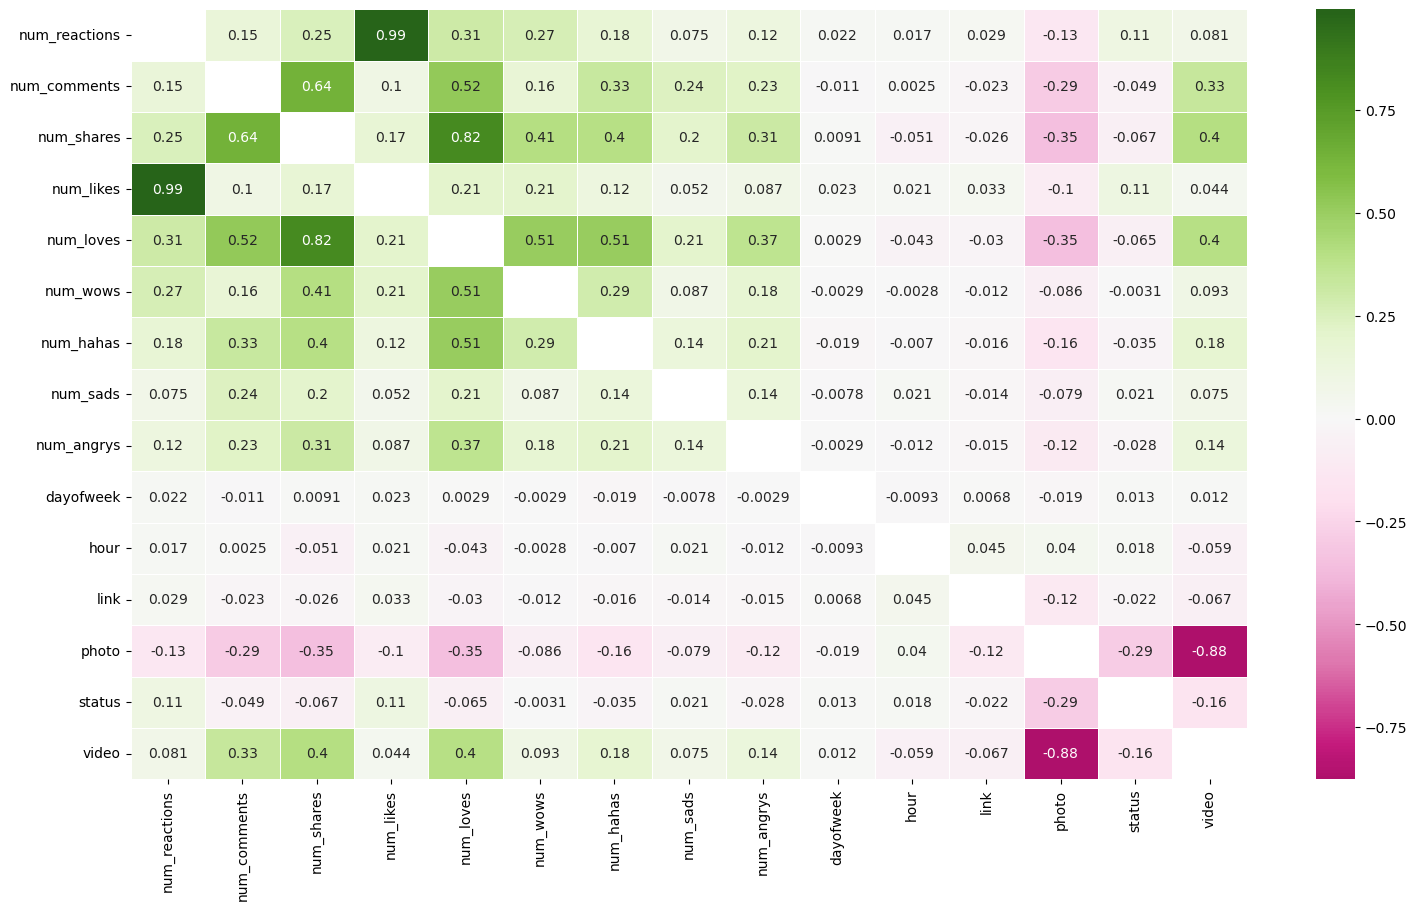

In [17]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(fb_thai_matrix, annot=True, linewidth=.5, ax=ax, cmap="PiYG", center=0)

Observem com els camps que hem creat, dayofweek i hour no es troba correlacionada amb altres variable. Per tant, podem prescindir d'ells.

In [18]:
fb_thai_dm.drop(['dayofweek', 'hour'], axis=1, inplace=True)

In [19]:
fb_thai_dm

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


#### 1. Agrupació no supervisada amb K-Means

Prèviament a ajustar un model K-Means, normalitzarem les dades.

In [20]:
mmscaler = MinMaxScaler()

for col in fb_thai_dm.columns:
    
    reshaped = np.array(fb_thai_dm[col]).reshape(-1,1)
    
    normalized = mmscaler.fit_transform(reshaped)
    
    if col == fb_thai_dm.columns[0]:
        fb_thai_norm = pd.DataFrame(normalized, columns=[col])
    else:
        fb_thai_norm[col] = normalized
    
    fb_thai_norm[col] = normalized

In [21]:
model = KMeans(n_clusters=3, random_state = 42)

model.fit(fb_thai_norm)

KMeans(n_clusters=3, random_state=42)

Com l'elecció del número de Clusters ha sigut arbitrària, podem utilizar el que s'anomena la inèrcia del model per trobar el millor nombre de clusters. La inèrcia ens indica com de junt es troben les mostres en un cluster. Contra menor siga la inèrcia, el model serà millor. 

Així tenim que:

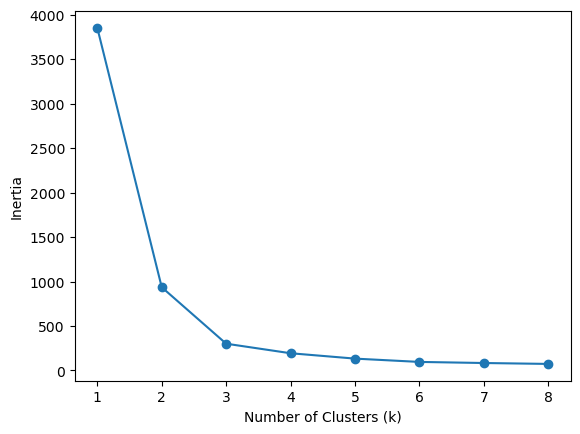

In [22]:
num_clusters = [1, 2, 3, 4, 5, 6, 7, 8]

inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k, random_state = 42)
  model.fit(fb_thai_norm)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()

La inèrcia disminueix més ràpidament al principi de anar incrementant el nombre de cluster i ho fa més a poc poc amb un k més gran. Es pot elegir el moment en el quan incrementar un cluster més la inèrcia disminueix poc. Per exemple, k=3, com havíem elegit al principi.

In [23]:
model = KMeans(n_clusters=3, random_state = 42)

model.fit(fb_thai_norm)

KMeans(n_clusters=3, random_state=42)

Identificarem a quin cluster ha assignat el model cada una de les observacions

In [24]:
fb_thai_norm['cluster_id'] = model.labels_

def distance_to_centroid(row, centroid):
    row = row[fb_thai_dm.columns]
    return euclidean(row, centroid)

fb_thai_norm['distance_to_center0'] = fb_thai_norm.apply(lambda r: distance_to_centroid(r,
    model.cluster_centers_[0]),1)

fb_thai_norm['distance_to_center1'] = fb_thai_norm.apply(lambda r: distance_to_centroid(r,
    model.cluster_centers_[1]),1)

In [25]:
fb_thai_norm.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,cluster_id,distance_to_center0,distance_to_center1
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,1,1.426190,0.117489
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.010245,1.416520
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,1,1.414712,0.039404
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.021291,1.416850
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.014996,1.415745


In [26]:
i=0

filter = fb_thai_norm['cluster_id'] == i
sub_fb = fb_thai_norm[filter]
clust = pd.DataFrame({'Cluster 1':sub_fb.mean()})

i=1

filter = fb_thai_norm['cluster_id'] == i
sub_fb = fb_thai_norm[filter]
clust['Cluster 2'] = sub_fb.mean()

i=2

filter = fb_thai_norm['cluster_id'] == i
sub_fb = fb_thai_norm[filter]
clust['Cluster 3'] = sub_fb.mean()

In [27]:
clust

,Cluster 1,Cluster 2,Cluster 3
num_reactions,0.038491,0.060172,0.091015
num_comments,0.000762,0.030609,0.001512
num_shares,0.000746,0.033785,0.000826
num_likes,0.037957,0.051596,0.090409
num_loves,0.002200,0.054095,0.002095
num_wows,0.002463,0.008806,0.003698
num_hahas,0.001215,0.011052,0.000625
num_sads,0.002794,0.008115,0.006460
num_angrys,0.001474,0.008196,0.000678
link,0.000000,0.000000,0.147196


In [28]:
fb_thai_norm[fb_thai_norm.columns[:-3]]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


Provem a visualitzar la separació amb un scatter plot. Perquè sigui més visual, farem un anàlisis de components principals i aíxi, podem representar les observacions utilitzant sols dos variables. Sembla que les diferències més clares són que el Cluster 1 són publicacions de fotos, el cluster 2 pubicacions de video, mentre que el cluster 3 són links i publiacions d'estat.

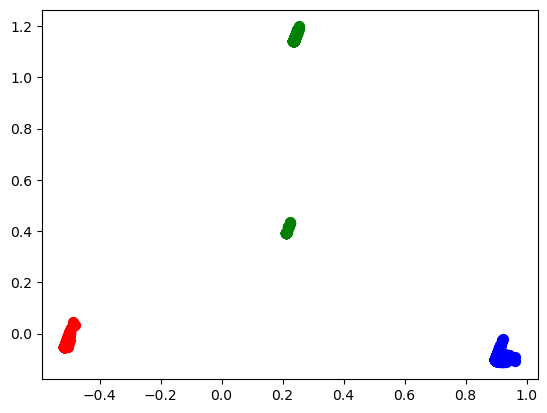

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_norm[fb_thai_norm.columns[:-3]])

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

labels = model.labels_

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=50, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=50, marker='o', color='blue')
plt.scatter(pc1_values_df[labels==2], pc2_values_df[labels==2], s=50, marker='o', color='green')

Sembla que les variables dummies dominen sobre les altres. Una altra manera de codificar les variables categóriques és a traves una transformació polinómica.

In [30]:
fb_thai_pol = fb_thai.copy()

In [31]:
fb_thai_pol.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,dayofweek,hour
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,6,6
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,5,22
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,5,6
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,5,2
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2,3


In [32]:
fb_thai_pol.drop('status_published', axis=1, inplace=True)
fb_thai_pol.drop('dayofweek', axis=1, inplace=True)
fb_thai_pol.drop('hour', axis=1, inplace=True)

In [33]:
mmscaler = MinMaxScaler()

for col in fb_thai_pol.columns:
    
    if col != 'status_type':
    
        reshaped = np.array(fb_thai_pol[col]).reshape(-1,1)

        normalized = mmscaler.fit_transform(reshaped)

        if col == fb_thai_pol.columns[0]:
            fb_thai_pol_norm = pd.DataFrame(normalized, columns=[col])
        else:
            fb_thai_pol_norm[col] = normalized

        fb_thai_pol_norm[col] = normalized
    else:
        reshaped = np.array(fb_thai_pol[col]).reshape(-1,1)
        if col == fb_thai_pol.columns[0]:
            fb_thai_pol_norm = pd.DataFrame(reshaped, columns=[col])
        else:
            fb_thai_pol_norm[col] = reshaped

In [34]:
fb_thai_pol_norm.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,photo,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,video,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,photo,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,photo,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [35]:
import category_encoders as ce

encoder = ce.PolynomialEncoder(cols=["status_type"])
fb_thai_pol_norm = encoder.fit_transform(fb_thai_pol_norm, verbose=1)

D:\Programes\Anaconda3\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


In [36]:
fb_thai_pol_norm.drop('intercept', axis=1, inplace=True)

In [37]:
model = KMeans(n_clusters=3, random_state=42)

model.fit(fb_thai_pol_norm)

KMeans(n_clusters=3, random_state=42)

In [38]:
columns = fb_thai_pol_norm.columns
fb_thai_pol_norm['cluster_id'] = model.labels_

def distance_to_centroid(row, centroid):
    row = row[columns]
    return euclidean(row, centroid)

fb_thai_pol_norm['distance_to_center0'] = fb_thai_pol_norm.apply(lambda r: distance_to_centroid(r,
    model.cluster_centers_[0]),1)

fb_thai_pol_norm['distance_to_center1'] = fb_thai_pol_norm.apply(lambda r: distance_to_centroid(r,
    model.cluster_centers_[1]),1)

In [39]:
i=0

filter = fb_thai_pol_norm['cluster_id'] == i
sub_fb = fb_thai_pol_norm[filter]
clust_pol = pd.DataFrame({'Cluster 1':sub_fb.mean()})

i=1

filter = fb_thai_pol_norm['cluster_id'] == i
sub_fb = fb_thai_pol_norm[filter]
clust_pol['Cluster 2'] = sub_fb.mean()

i=2

filter = fb_thai_pol_norm['cluster_id'] == i
sub_fb = fb_thai_pol_norm[filter]
clust_pol['Cluster 3'] = sub_fb.mean()

In [40]:
clust_pol

,Cluster 1,Cluster 2,Cluster 3
status_type_0,-0.223607,-0.670820,0.604992
status_type_1,-0.500000,0.500000,0.352804
status_type_2,0.670820,-0.223607,0.091950
num_reactions,0.038491,0.060172,0.091015
num_comments,0.000762,0.030609,0.001512
num_shares,0.000746,0.033785,0.000826
num_likes,0.037957,0.051596,0.090409
num_loves,0.002200,0.054095,0.002095
num_wows,0.002463,0.008806,0.003698
num_hahas,0.001215,0.011052,0.000625


Text(0, 0.5, 'Component 2')

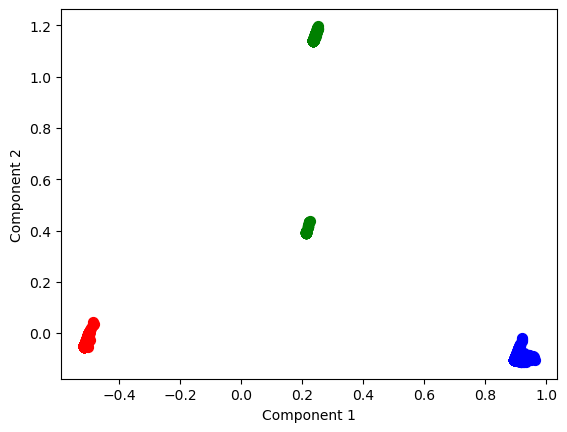

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_pol_norm[fb_thai_pol_norm.columns[:-3]])

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

labels = model.labels_

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=50, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=50, marker='o', color='blue')
plt.scatter(pc1_values_df[labels==2], pc2_values_df[labels==2], s=50, marker='o', color='green')

plt.xlabel("Component 1")
plt.ylabel("Component 2")

Els resultats continuen essent dominants per les variables categóriques.

Existeix el paquet Kmodes que preten integrar les variables categóriques en un model K-Means. Provem-ho i vegem si així obtenim un resultat diferent.

In [42]:
fb_thai_kmodes = fb_thai_pol.copy()

In [43]:
fb_thai_kmodes

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [44]:
from kmodes.kprototypes import KPrototypes
model = KPrototypes(n_clusters=3, random_state = 42, init='Huang', n_init=1)

model.fit_predict(fb_thai_kmodes, categorical=[0])

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

Si representem per components principals incorporant la variable categórica codificada com a numérica observem com ara on hi havia un clusters ara es troben mesclats.

Text(0, 0.5, 'Component 2')

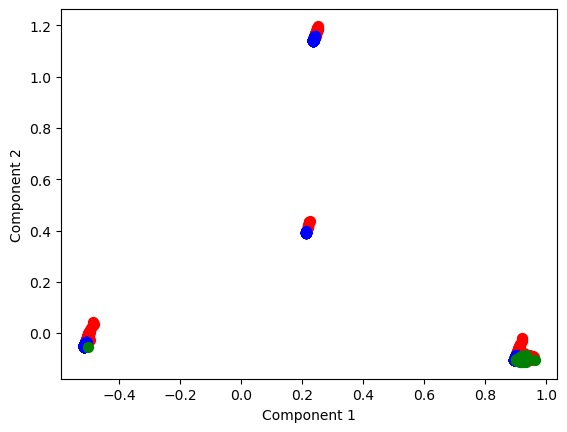

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_pol_norm[fb_thai_pol_norm.columns[:-3]])

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

labels = model.labels_

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=50, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=50, marker='o', color='blue')
plt.scatter(pc1_values_df[labels==2], pc2_values_df[labels==2], s=50, marker='o', color='green')

plt.xlabel("Component 1")
plt.ylabel("Component 2")

Si el·liminem la variable categórica i fem de nou, components principals, vegem com la separació de clusters que ha fet el model K-Modes no té gaire en compte aquesta variable.

Text(0, 0.5, 'Component 2')

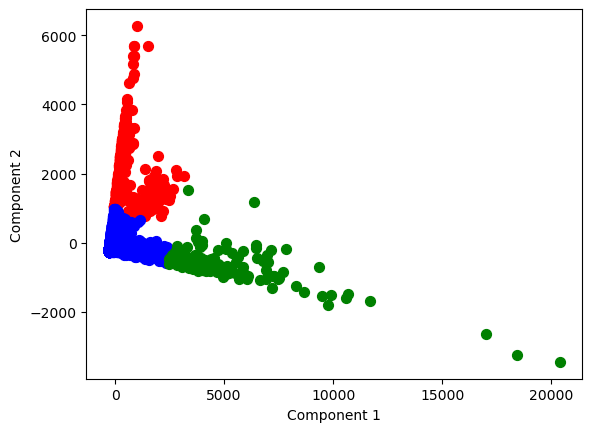

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_kmodes[fb_thai_kmodes.columns[1:]])

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

labels = model.labels_

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=50, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=50, marker='o', color='blue')
plt.scatter(pc1_values_df[labels==2], pc2_values_df[labels==2], s=50, marker='o', color='green')

plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [47]:
fb_thai_nocat = fb_thai_kmodes[fb_thai_kmodes.columns[1:]]

In [48]:
model = KMeans(n_clusters=3, random_state=42)

model.fit(fb_thai_nocat)

KMeans(n_clusters=3, random_state=42)

Text(0, 0.5, 'Component 2')

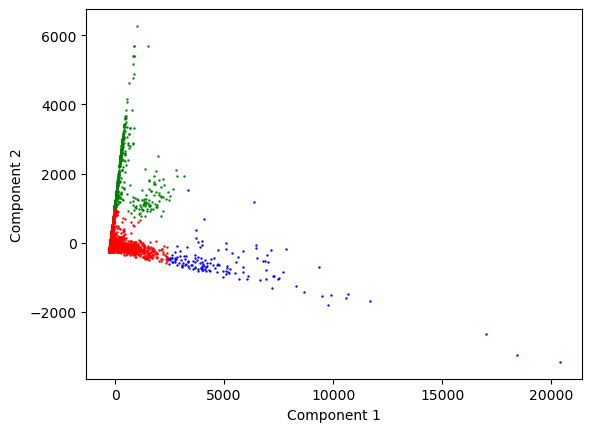

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_nocat)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

labels = model.labels_

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=0.5, marker='o', color='red', alpha=1)
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=0.5, marker='o', color='blue', alpha=1)
plt.scatter(pc1_values_df[labels==2], pc2_values_df[labels==2], s=0.5, marker='o', color='green')

plt.xlabel("Component 1")
plt.ylabel("Component 2")

Tornem a revisar si potser un altre nombre de cluster seria més adequat.

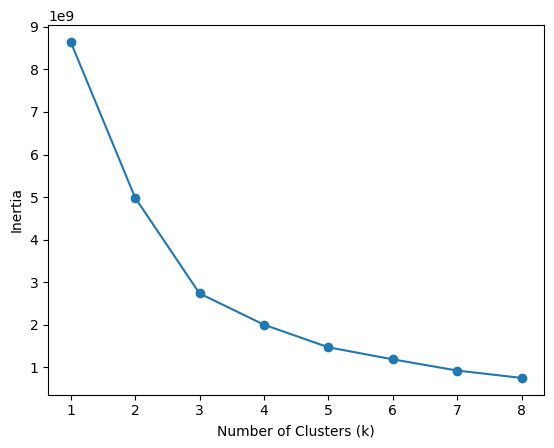

In [50]:
num_clusters = [1, 2, 3, 4, 5, 6, 7, 8]

inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k, random_state = 42)
  model.fit(fb_thai_nocat)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()

Apliquem 5 clusters

In [51]:
model = KMeans(n_clusters=5, random_state=42)

model.fit(fb_thai_nocat)

KMeans(n_clusters=5, random_state=42)

Text(0, 0.5, 'Component 2')

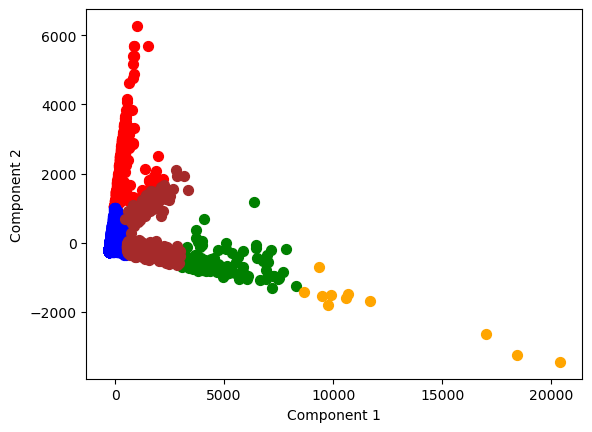

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_nocat)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

labels = model.labels_

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=50, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=50, marker='o', color='blue')
plt.scatter(pc1_values_df[labels==2], pc2_values_df[labels==2], s=50, marker='o', color='green')
plt.scatter(pc1_values_df[labels==3], pc2_values_df[labels==3], s=50, marker='o', color='brown')
plt.scatter(pc1_values_df[labels==4], pc2_values_df[labels==4], s=50, marker='o', color='orange')

plt.xlabel("Component 1")
plt.ylabel("Component 2")

#### 2. Agrupació jeràrquica

Apliquem l'agrupació jeràrquica. Visualitzem mitjançant un dendograma com s'organitzen les observacions agrupant-les segons la distància que els separa i de manera jeràrquica.

In [53]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.spatial import distance_matrix 
from scipy.spatial.distance import squareform

In [54]:
fb_thai_sch = fb_thai_norm.copy()

fb_thai_sch.drop(fb_thai_sch.columns[13:], axis=1, inplace=True)

In [55]:
fb_thai_sch.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


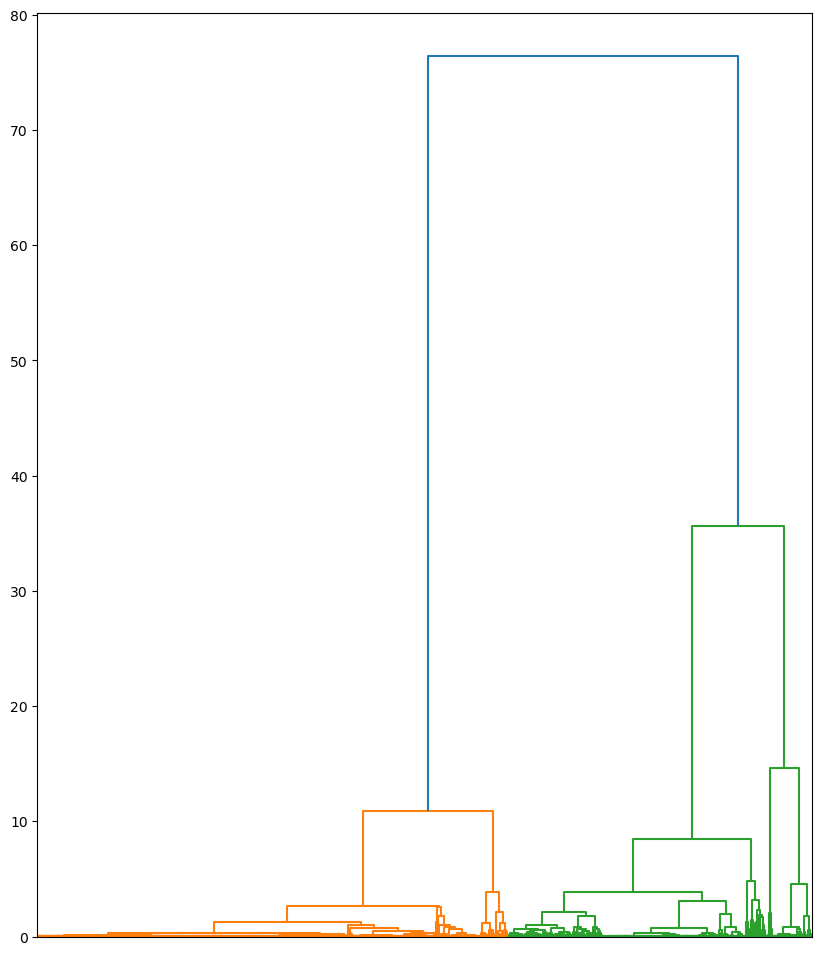

In [56]:
plt.subplots(1, 1, figsize=(10,12))
dend = sch.dendrogram(sch.linkage(fb_thai_sch, method='ward', metric="euclidean"), no_labels=True)

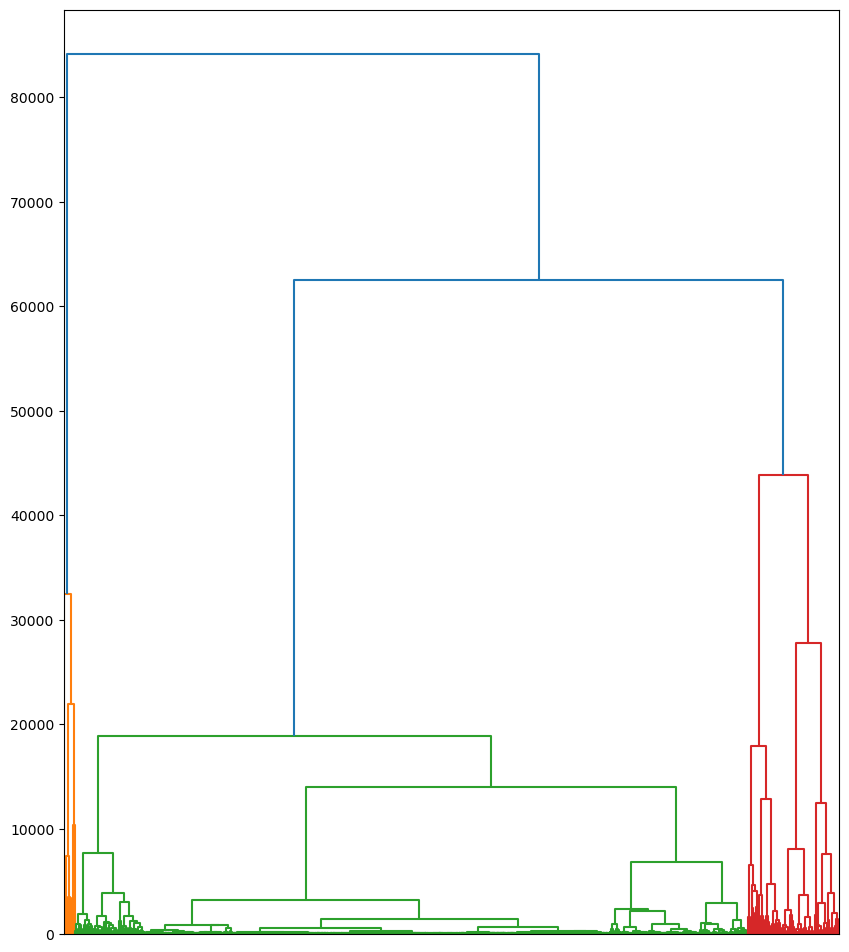

In [57]:
# Prova sense variables categories

plt.subplots(1, 1, figsize=(10,12))
dend = sch.dendrogram(sch.linkage(fb_thai_nocat, method='ward', metric="euclidean"), no_labels=True)

Trobem finalment que podem separar les mostres en diversos clusters que contenen d'altres més petits segons la seua semblança. El número de clusters que separarem es pot fer en base de les línies més llargues sense tallar que trobem al gràfic. Per tant, estariem parlant de dos clusters.

https://www.statdeveloper.com/agrupacion-en-cluster-jerarquica-en-python/

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [58]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(fb_thai_nocat)
labels = model.labels_

Ajustem un model per agrupar en dos clusters les mostres. Per poder veure millor els grups que obtenim, podem aplicar components principals.

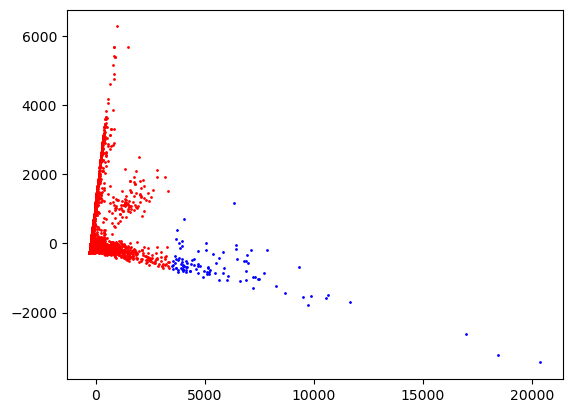

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_nocat)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=1, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=1, marker='o', color='blue')

Sembla que, visualment, hi podrien diferenciarse fins a cuatre clusters

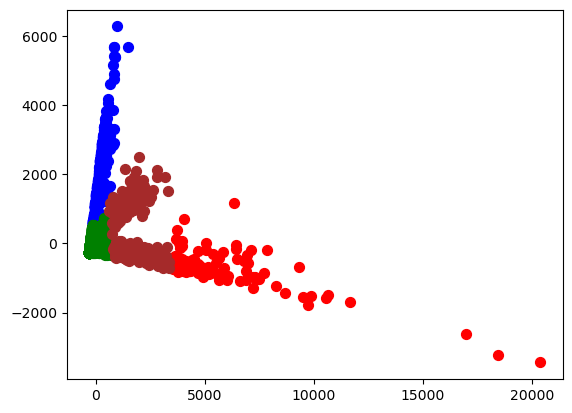

In [60]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(fb_thai_nocat[fb_thai_nocat.columns[:13]])
labels = model.labels_
plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=50, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=50, marker='o', color='blue')
plt.scatter(pc1_values_df[labels==2], pc2_values_df[labels==2], s=50, marker='o', color='green')
plt.scatter(pc1_values_df[labels==3], pc2_values_df[labels==3], s=50, marker='o', color='brown')

#### 3. Càlcul rendiment amb Silhouette

In [61]:
fb_thai_norm.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'link', 'photo',
       'status', 'video', 'cluster_id', 'distance_to_center0',
       'distance_to_center1'],
      dtype='object')

In [62]:
fb_thai_kmodes[fb_thai_kmodes.columns[:12]]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [63]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# Kmeans normalitzats amb categories codificados 'one-hot'
model = KMeans(n_clusters=3, random_state=42)
model.fit(fb_thai_nocat)
labels = model.labels_
variables = fb_thai_nocat
silhouette_avg = silhouette_score(variables, labels)
print('silhouette average')
print(f'Kmeans:', np.round(silhouette_avg, 2))

silhouette average
Kmeans: 0.81


Utilitzem el coeficient silhouete que calcula la distancia entre cada observació i el cluster més proper al que no pertany. Provem amb 5 clusters per als 3 models diferents que hem provat.

In [64]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# Kmeans normalitzats amb categories codificados 'one-hot'
model = KMeans(n_clusters=5, random_state=42)
model.fit(fb_thai_nocat)
labels = model.labels_
variables = fb_thai_nocat
silhouette_avg = silhouette_score(variables, labels)
print('silhouette average')
print(f'K-Means:', np.round(silhouette_avg, 2))

# Jerarquització

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(fb_thai_norm[fb_thai_nocat.columns[:13]])
labels = model.labels_
variables = fb_thai_nocat
silhouette_avg = silhouette_score(variables, labels)
print(f'Jerarquització: ', np.round(silhouette_avg, 2))

silhouette average
K-Means: 0.79
Jerarquització:  0.68


També podem utilitzar l'anàlisis silhouette per veure quin nombre de clusters seria el més idoni. Així, per al model de K-Means amb codificació one-hot del principi.

In [65]:
for k in range(2,10):

    model = KMeans(n_clusters=k, random_state = 42)
    labels = model.fit_predict(fb_thai_nocat)
    
    silhouette_avg = silhouette_score(fb_thai_nocat, labels)
    print("Número de clusters =", k,
          "Mitjana de silhouette_score :", silhouette_avg)

Número de clusters = 2 Mitjana de silhouette_score : 0.8721918902988716
Número de clusters = 3 Mitjana de silhouette_score : 0.8121434245162984
Número de clusters = 4 Mitjana de silhouette_score : 0.8164618845259767
Número de clusters = 5 Mitjana de silhouette_score : 0.7851638737141318
Número de clusters = 6 Mitjana de silhouette_score : 0.7599650783154499
Número de clusters = 7 Mitjana de silhouette_score : 0.7614722601829589
Número de clusters = 8 Mitjana de silhouette_score : 0.7613830179832883
Número de clusters = 9 Mitjana de silhouette_score : 0.6572466909097717


In [66]:
for k in range(2,10):

    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = model.fit_predict(fb_thai_nocat)
    
    silhouette_avg = silhouette_score(fb_thai_nocat, labels)
    print("Número de clusters =", k,
          "Mitjana de silhouette_score :", silhouette_avg)

Número de clusters = 2 Mitjana de silhouette_score : 0.8843796686973606
Número de clusters = 3 Mitjana de silhouette_score : 0.7728752135851344
Número de clusters = 4 Mitjana de silhouette_score : 0.7924439246095623
Número de clusters = 5 Mitjana de silhouette_score : 0.7937148972633156
Número de clusters = 6 Mitjana de silhouette_score : 0.7514710272655858
Número de clusters = 7 Mitjana de silhouette_score : 0.7511824570716553
Número de clusters = 8 Mitjana de silhouette_score : 0.6596194930347684
Número de clusters = 9 Mitjana de silhouette_score : 0.6696963807799015


El silhouette_score es va reduit a mesura que augmentem el número de Clusters. Un número silhouette proper a 1 indica que les mostres d'un cluster es troben bastant distanciades dels altres clusters. Cada mostra tindria un índex diferent i ho podem apreciar amb un gràfic silhouette.

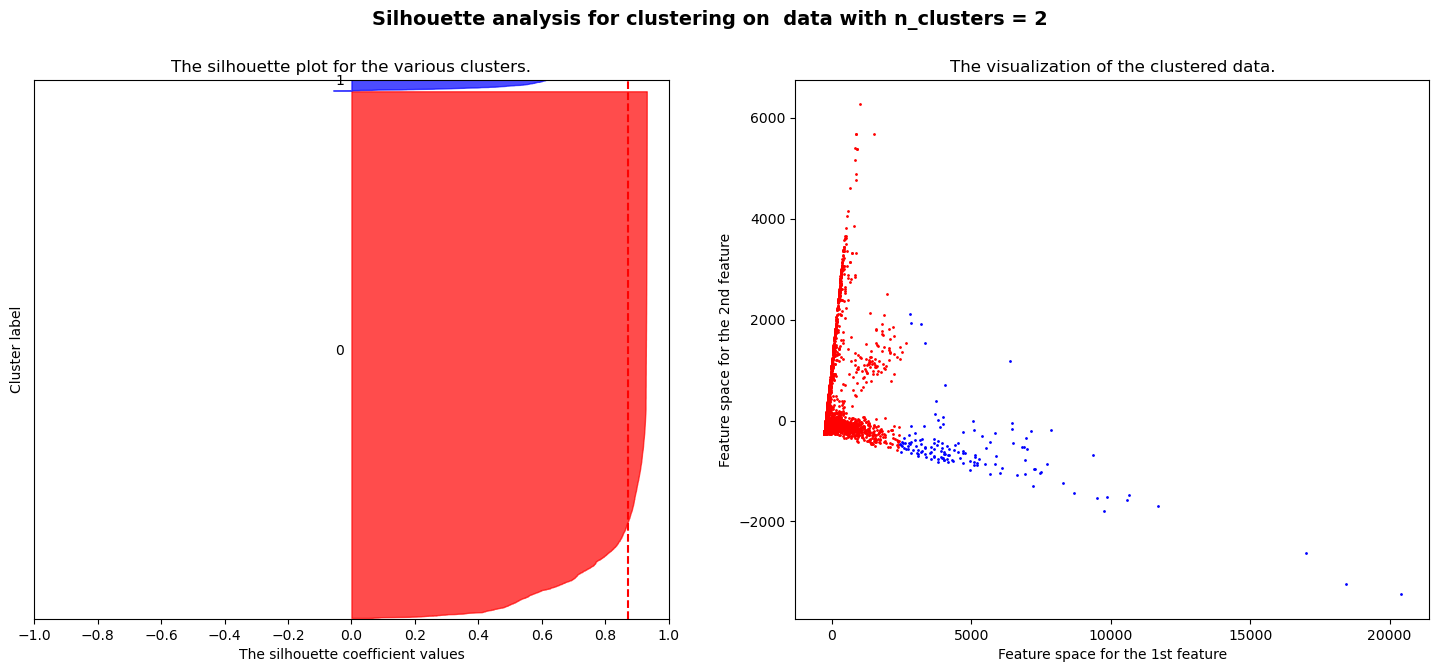

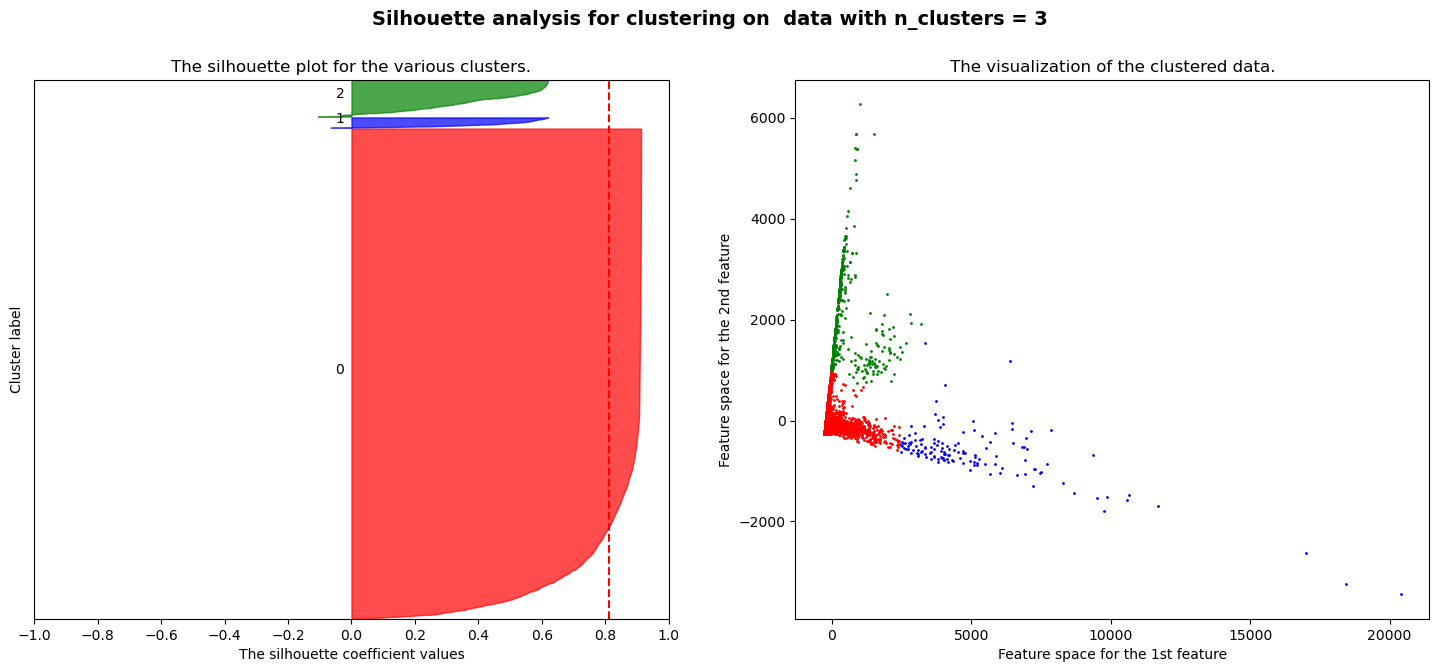

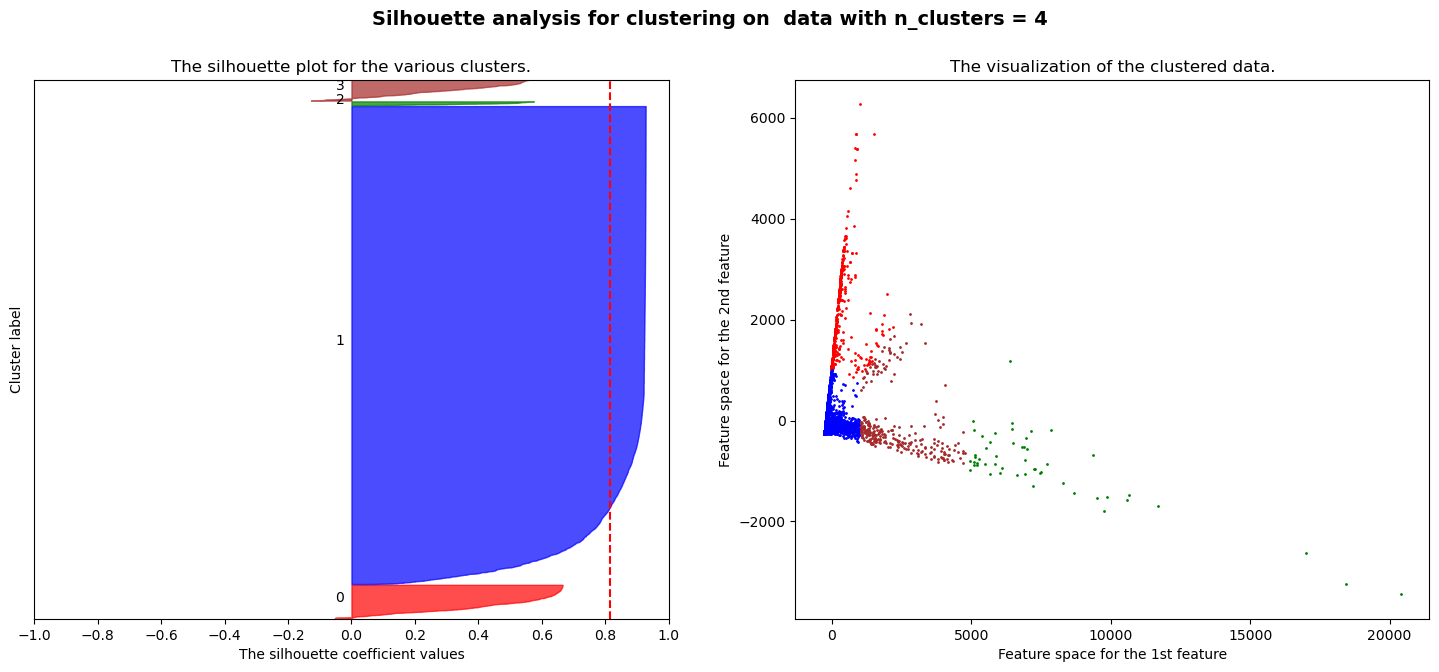

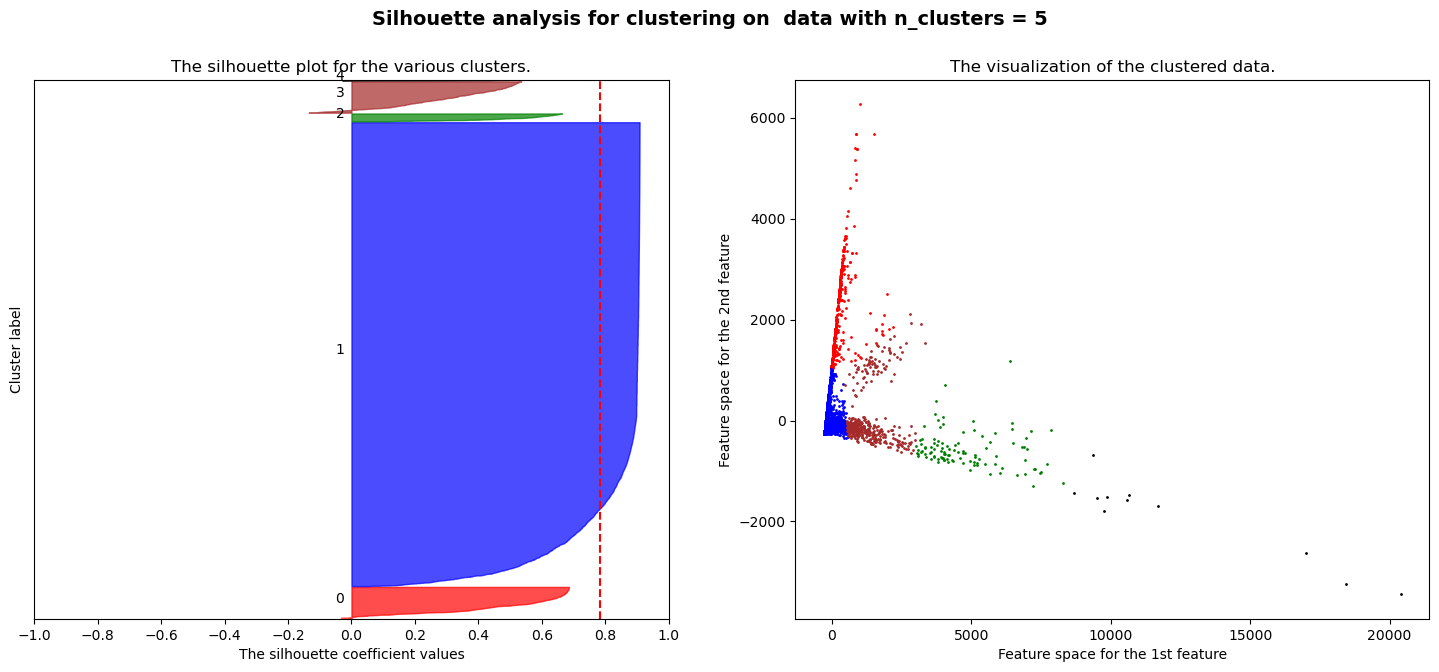

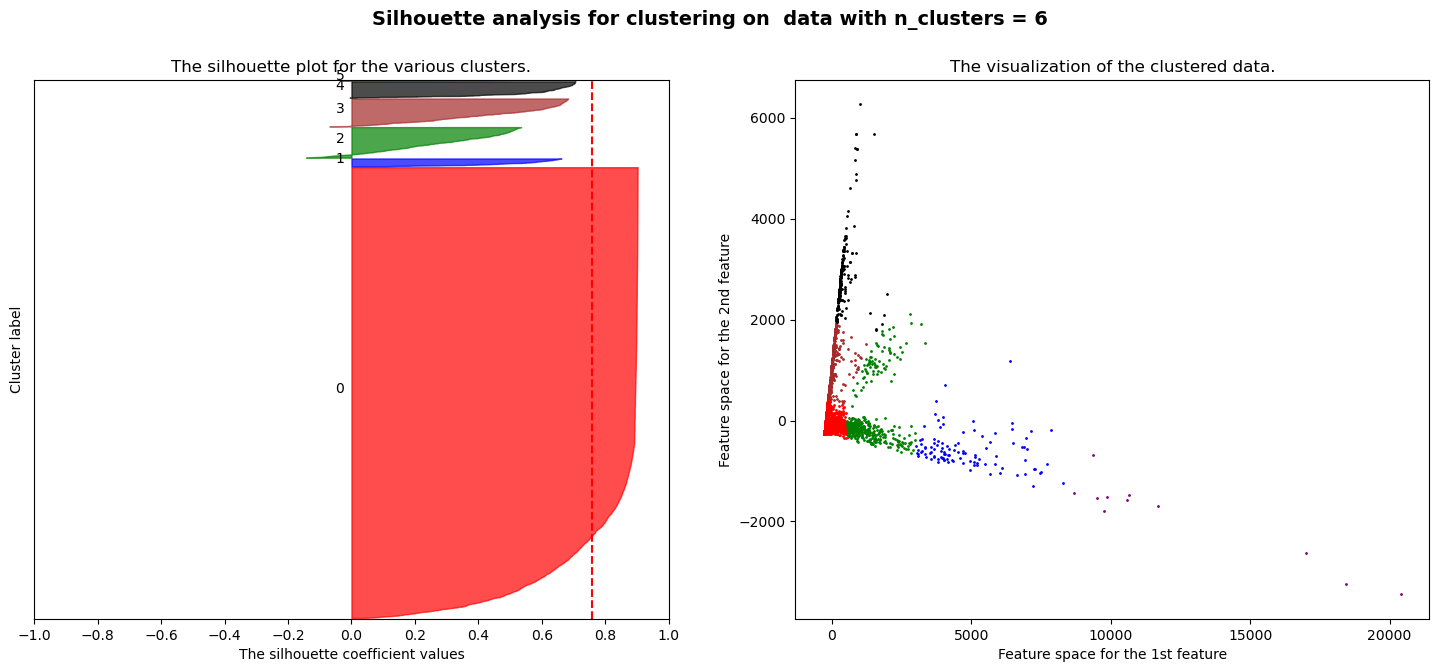

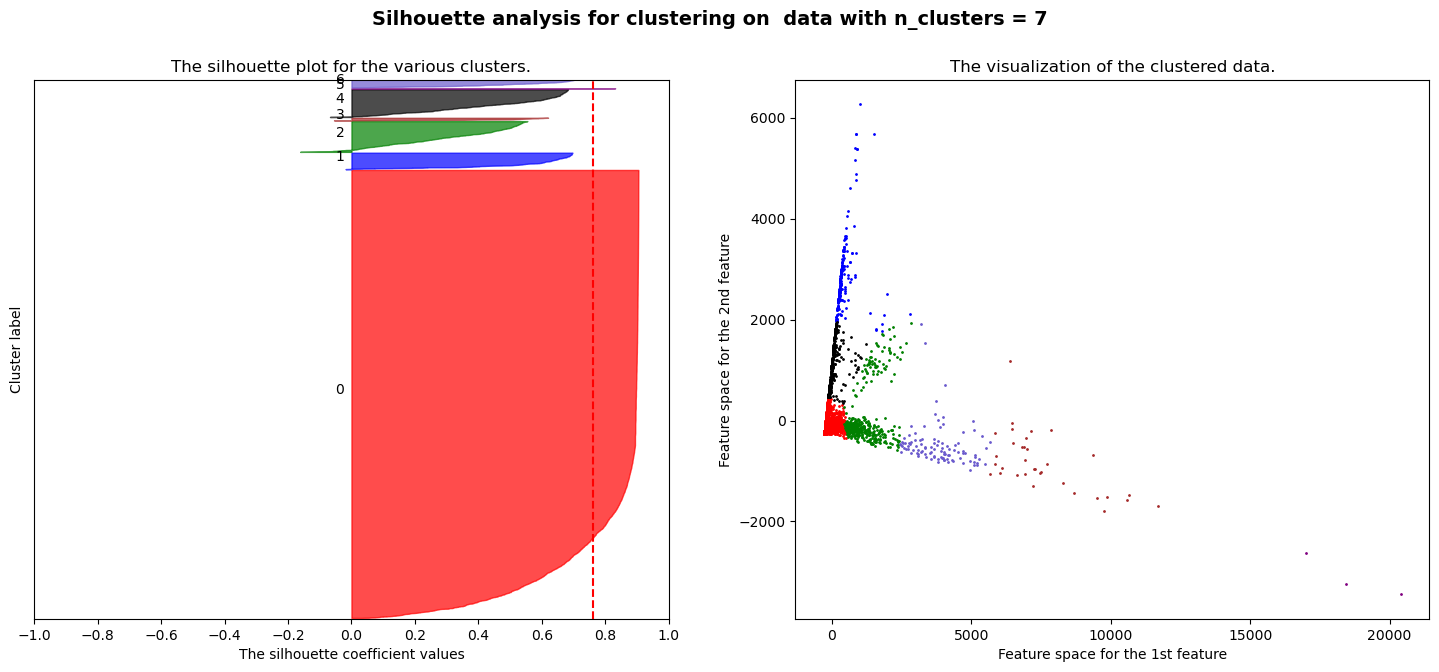

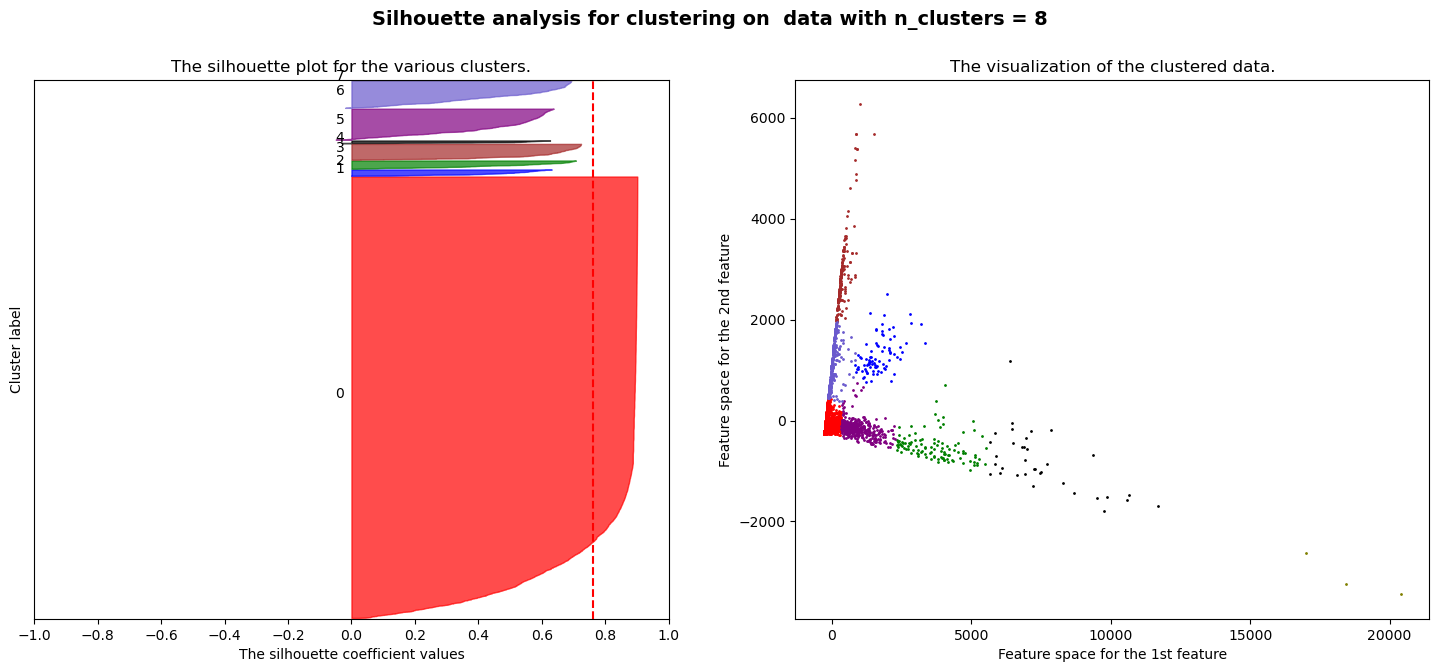

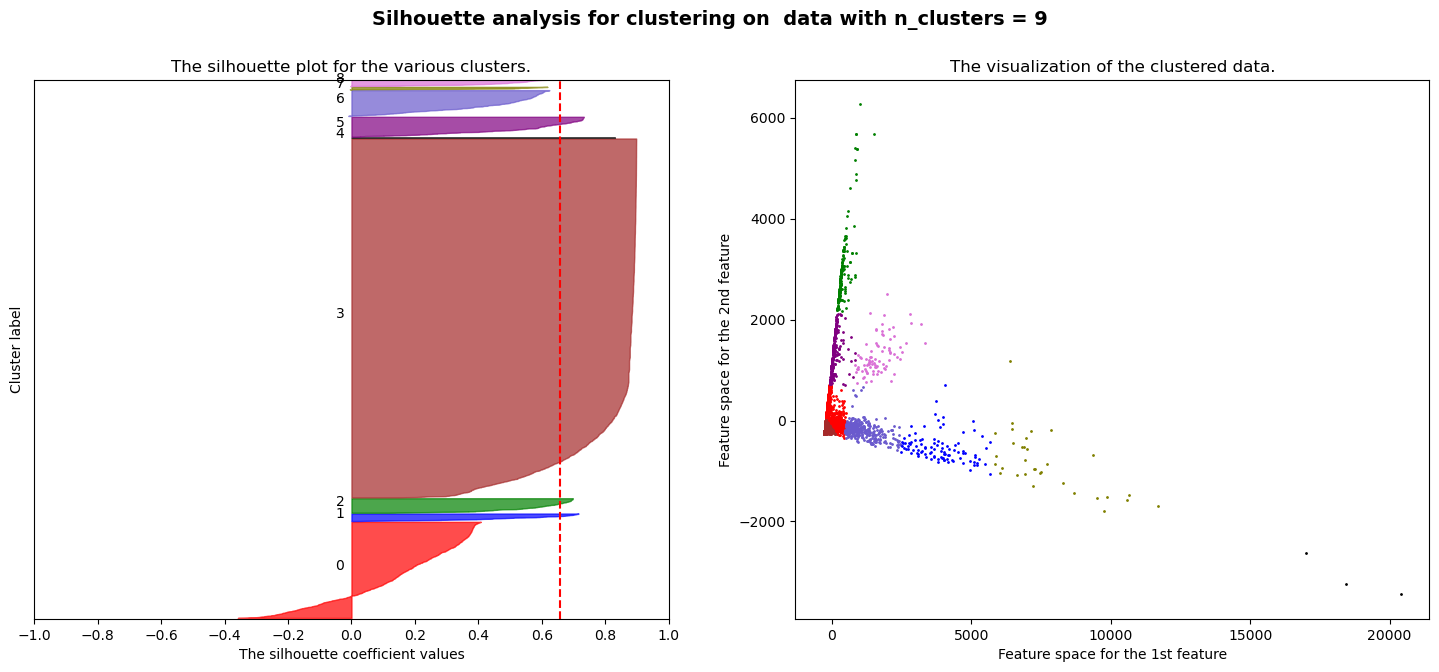

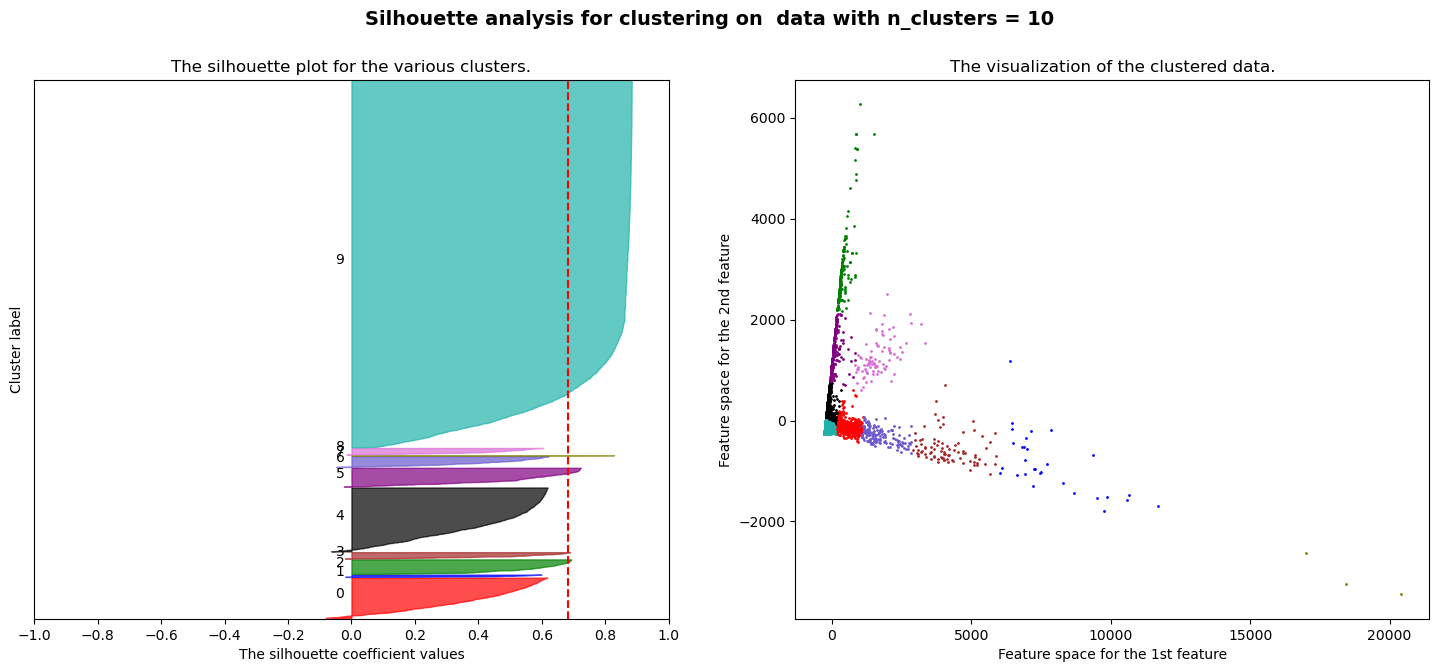

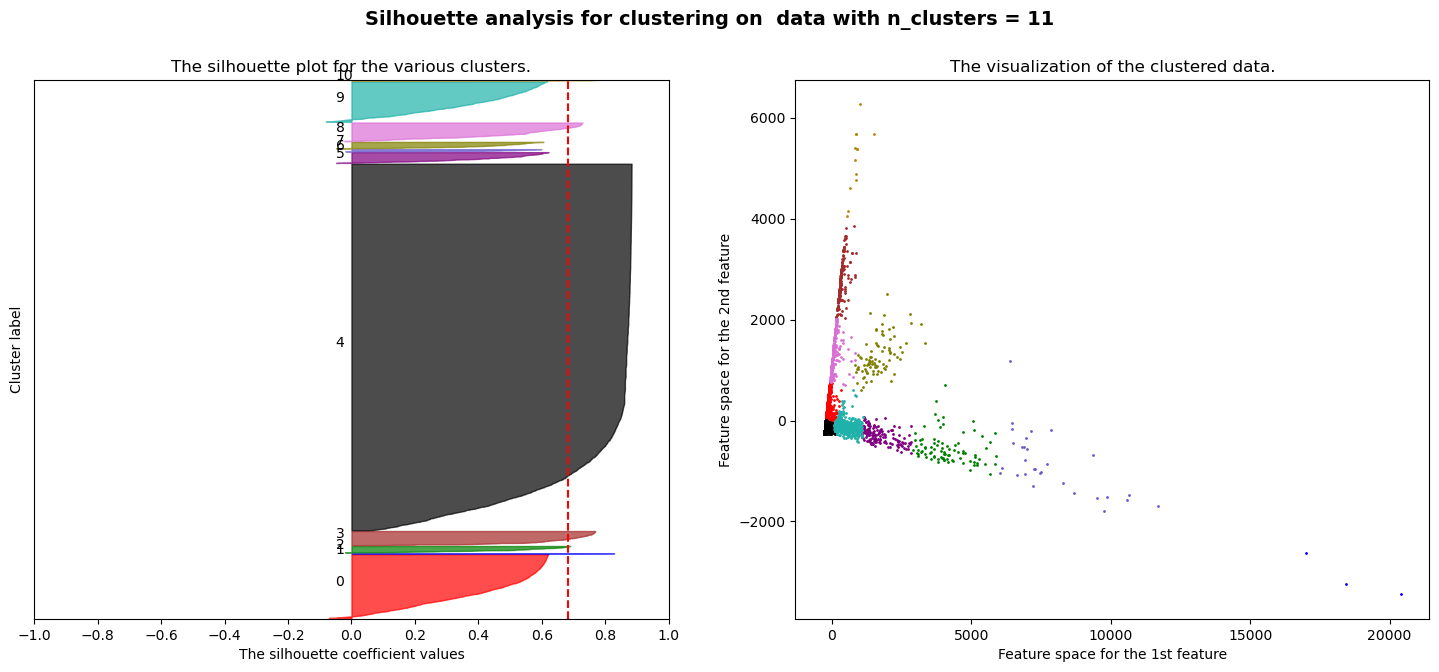

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

col_selection = ['red', 'blue', 'green', 'brown', 'black', 'purple', 'slateblue', 'olive', 'orchid', 'lightseagreen', 'darkgoldenrod', 'grey']

# Basat en l'exemple del propi paquet sklearn en https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

fb_thai_sil = fb_thai_nocat

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_sil)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

for k in range(2, 12):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Es dibuixa el gràfic silhouete de l'esquerra
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(fb_thai_sil) + (k) * 10])
    
    model = KMeans(n_clusters=k, random_state = 42, max_iter=300)
    cluster_labels = model.fit_predict(fb_thai_sil)

    silhouette_avg = silhouette_score(fb_thai_sil, cluster_labels)
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fb_thai_sil, cluster_labels)

    y_lower = 10
    

    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = col_selection[i]
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
                
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Línia vertical vermella que indica el valor de average_silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter Plot

    for i in range(k):
        ax2.scatter(pc1_values_df[cluster_labels==i], pc2_values_df[cluster_labels==i], s=1, marker='o', color=[col_selection[i]])
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

In [92]:
fb_thai_norm[fb_thai_norm.columns[:-3]]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


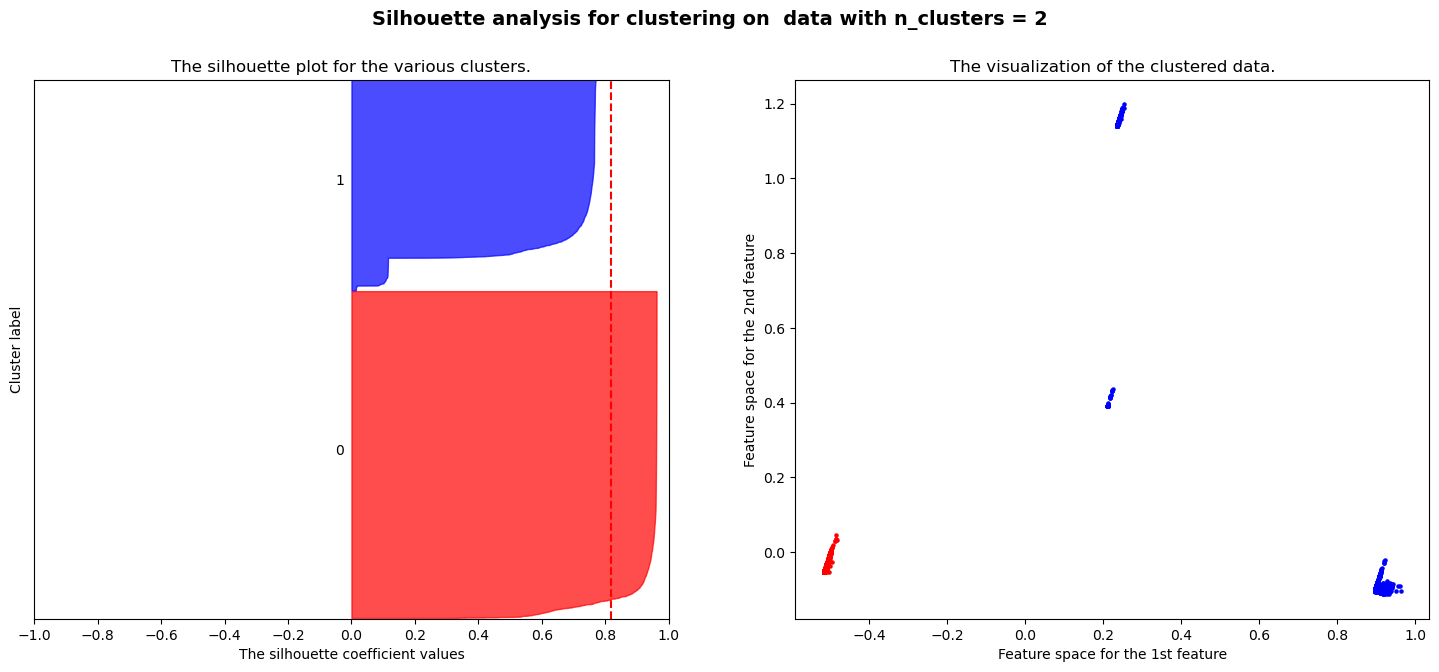

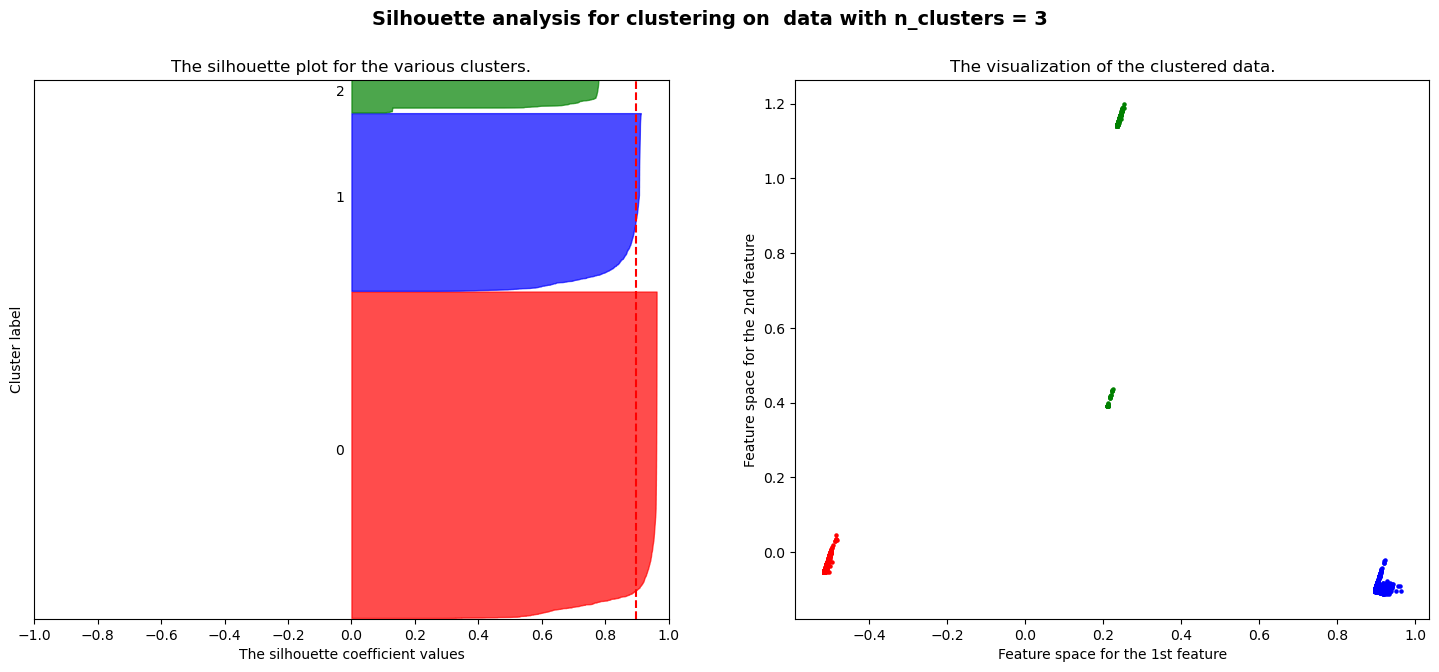

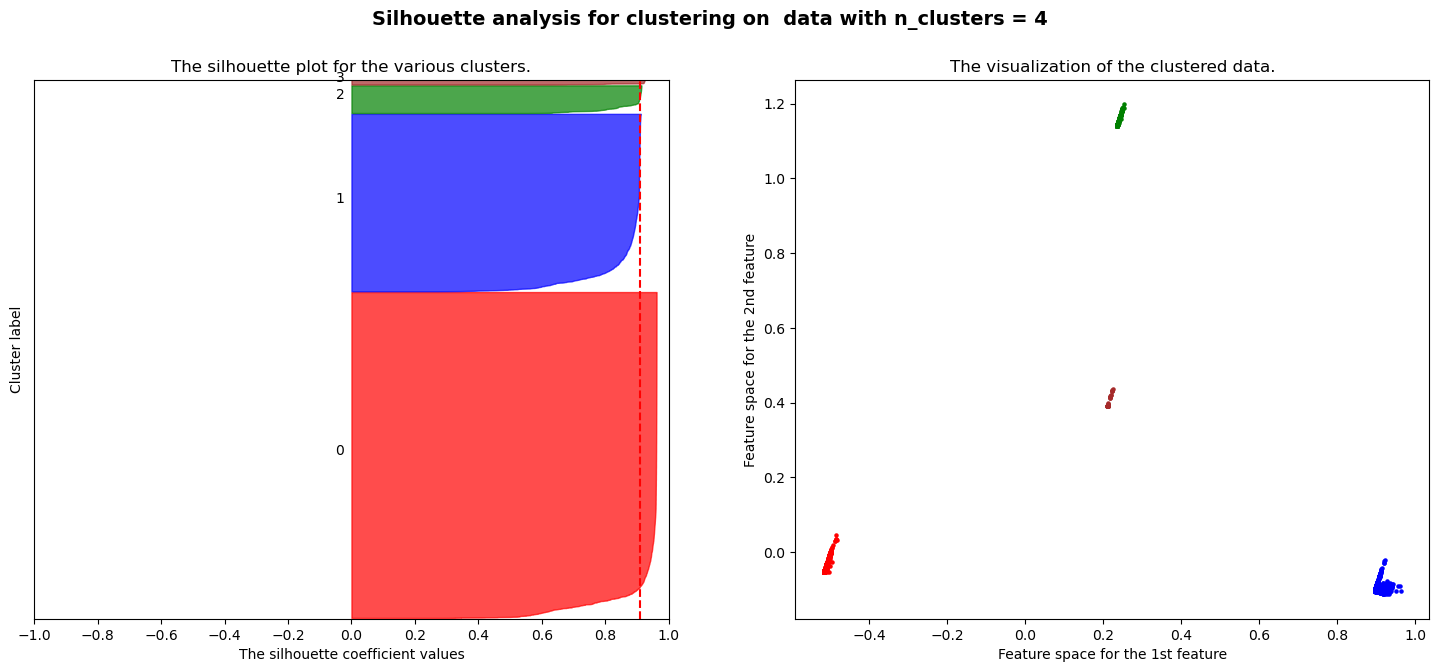

In [95]:
col_selection = ['red', 'blue', 'green', 'brown', 'black', 'purple', 'slateblue', 'olive', 'orchid', 'lightseagreen', 'darkgoldenrod', 'grey']


fb_thai_sil = fb_thai_norm[fb_thai_norm.columns[:-3]]

pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_sil)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

                           
for k in range(2, 5):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Es dibuixa el gràfic silhouete de l'esquerra
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(fb_thai_sil) + (k) * 10])
    
    model = KMeans(n_clusters=k, random_state = 42, max_iter=300)
    cluster_labels = model.fit_predict(fb_thai_sil)

    silhouette_avg = silhouette_score(fb_thai_sil, cluster_labels)
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fb_thai_sil, cluster_labels)

    y_lower = 10
    

    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = col_selection[i]
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
                
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Línia vertical vermella que indica el valor de average_silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter Plot

    for i in range(k):
        ax2.scatter(pc1_values_df[cluster_labels==i], pc2_values_df[cluster_labels==i], s=5, marker='o', color=[col_selection[i]])
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()